In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import h5py
import scib
import scipy.io as sio

In [3]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3,3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.0
deprecated          1.2.12
executing           1.2.0
google              NA
h5py                3.7.0
igraph              0.10.2
ipykernel           6.23.1
jedi                0.18.2
joblib              1.0.1
kiwisolver          1.3.1
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.4.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.3
numpy               1.22.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.38
psutil              5.

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [4]:
dataset_name = ["cell_lines", "panc8_rm", "uc3", "crc"]

In [5]:
i=1
re=0.1

In [230]:
# load raw data
adata_raw = sc.read_h5ad('/home/suyanchi/project/dab/data/batch/'+dataset_name[i]+'.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 10865 × 23864
    obs: 'ClusterID', 'ClusterName', 'batch', 'celltype', 'nCount_RNA', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'PCs', 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'
    obsp: 'connectivities', 'distances'

In [231]:
dat_sc = sio.loadmat('/home/suyanchi/project/dab/results/'+dataset_name[i]+'.mat')
dat_sc['re']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.8499687 , 1.2339401 ,
        2.1111457 ],
       [0.10892975, 0.09783457, 0.10036337, ..., 1.9749207 , 0.88908   ,
        2.238483  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [247]:
adata_raw.X = dat_sc['re'].T

In [248]:
sc.pp.pca(adata_raw)
sc.pp.neighbors(adata_raw)
sc.tl.umap(adata_raw)
# scib.pp.reduce_data(
#     adata_raw, n_top_genes=2000, batch_key="batch", pca=True, neighbors=False
# )

HVG


/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/prepr

Using 521 HVGs from full intersect set
Using 385 HVGs from n_batch-1 set
Using 582 HVGs from n_batch-2 set
Using 512 HVGs from n_batch-3 set
Using 2000 HVGs
Computed 2000 highly variable genes
PCA


In [234]:
# sc.pl.umap(adata_raw, color=['batch', 'celltype'], palette=sc.pl.palettes.vega_20_scanpy)

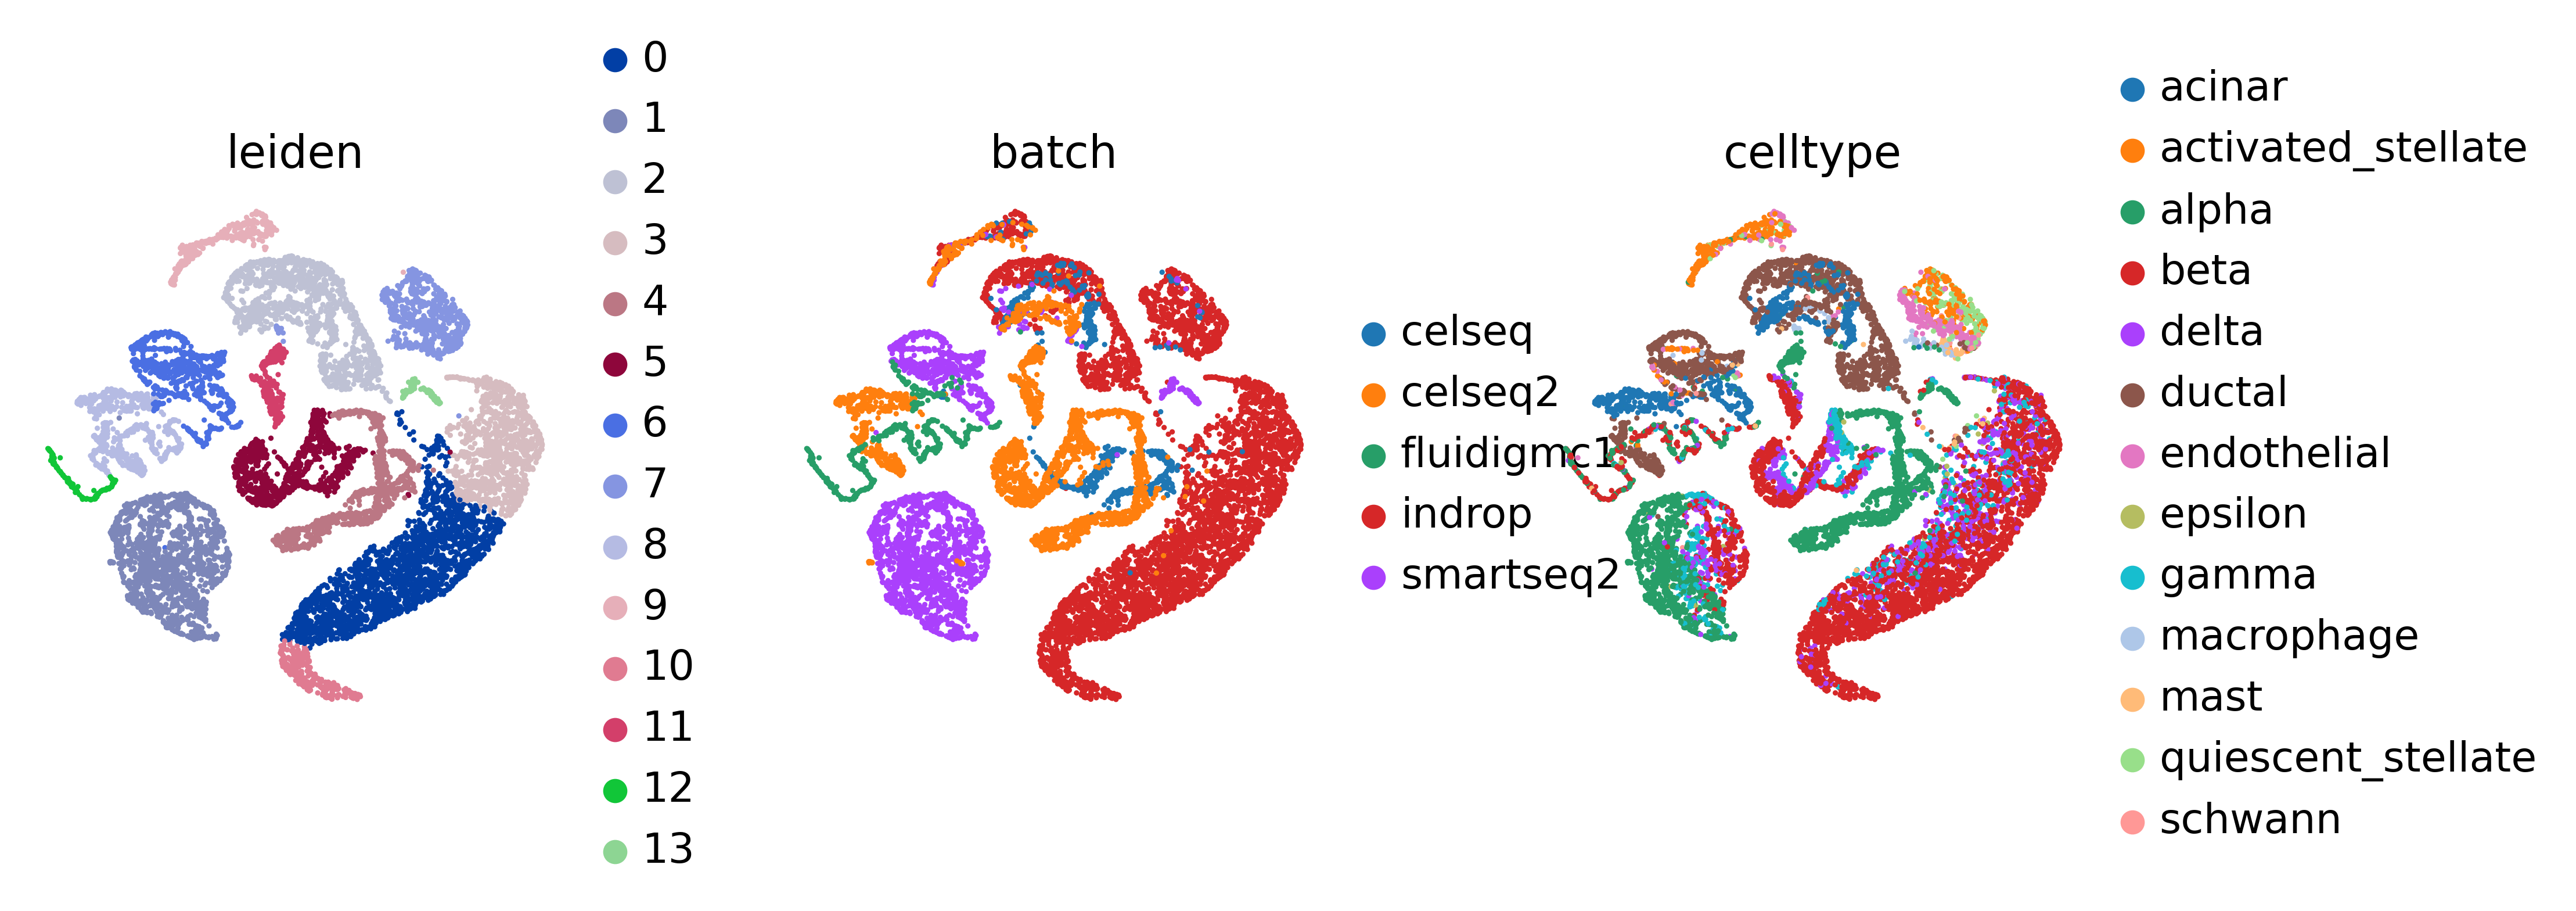

In [249]:
sc.tl.leiden(adata_raw, resolution=re)
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'celltype'])

In [236]:
# ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
# nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
# asw = scib.metrics.silhouette(adata_raw, label_key='celltype', embed='X_pca')
# b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='celltype', embed='X_pca', verbose=False)
# print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

In [237]:
%%time
# sc.external.pp.bbknn(adata_raw, batch_key='batch')
sc.external.pp.harmony_integrate(adata_raw, key='batch')
sc.pp.neighbors(adata_raw, use_rep='X_pca_harmony')

2023-07-08 14:34:46,722 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2023-07-08 14:34:52,991 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-08 14:34:53,070 - harmonypy - INFO - Iteration 1 of 10
2023-07-08 14:34:55,423 - harmonypy - INFO - Iteration 2 of 10
2023-07-08 14:34:57,875 - harmonypy - INFO - Iteration 3 of 10
2023-07-08 14:35:00,311 - harmonypy - INFO - Iteration 4 of 10
2023-07-08 14:35:02,707 - harmonypy - INFO - Iteration 5 of 10
2023-07-08 14:35:04,842 - harmonypy - INFO - Iteration 6 of 10
2023-07-08 14:35:06,136 - harmonypy - INFO - Iteration 7 of 10
2023-07-08 14:35:07,142 - harmonypy - INFO - Iteration 8 of 10
2023-07-08 14:35:08,125 - harmonypy - INFO - Converged after 8 iterations


CPU times: user 7min 2s, sys: 19min, total: 26min 2s
Wall time: 22.8 s


In [238]:
sc.tl.umap(adata_raw)

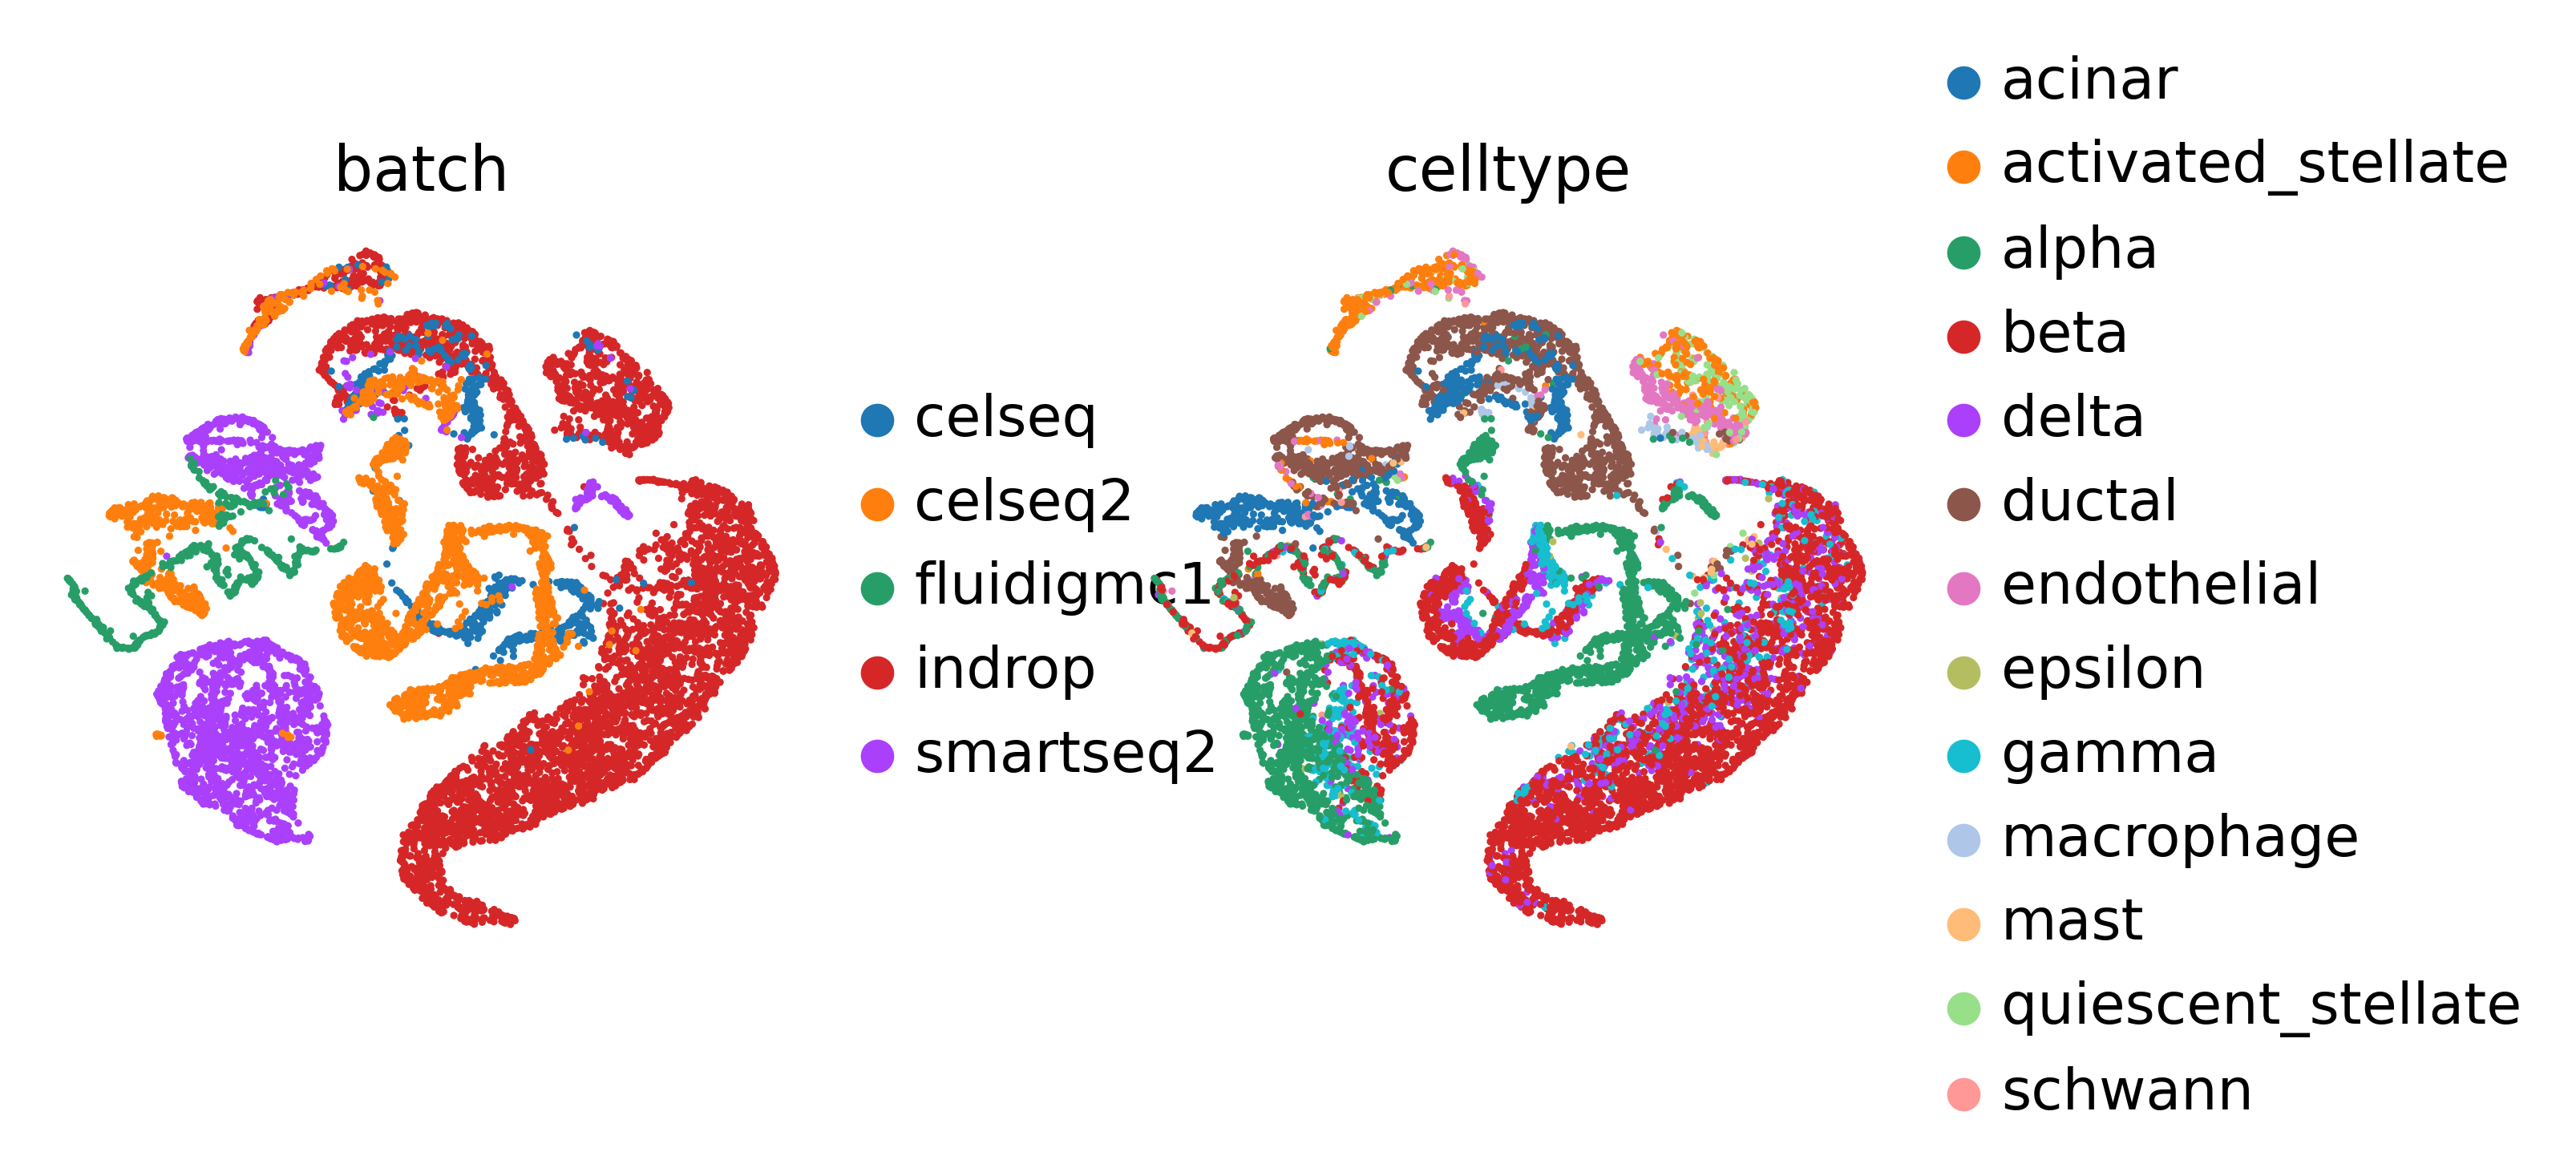

In [239]:
sc.pl.umap(adata_raw, color=['batch', 'celltype'])

In [240]:
sc.tl.leiden(adata_raw, resolution=re)

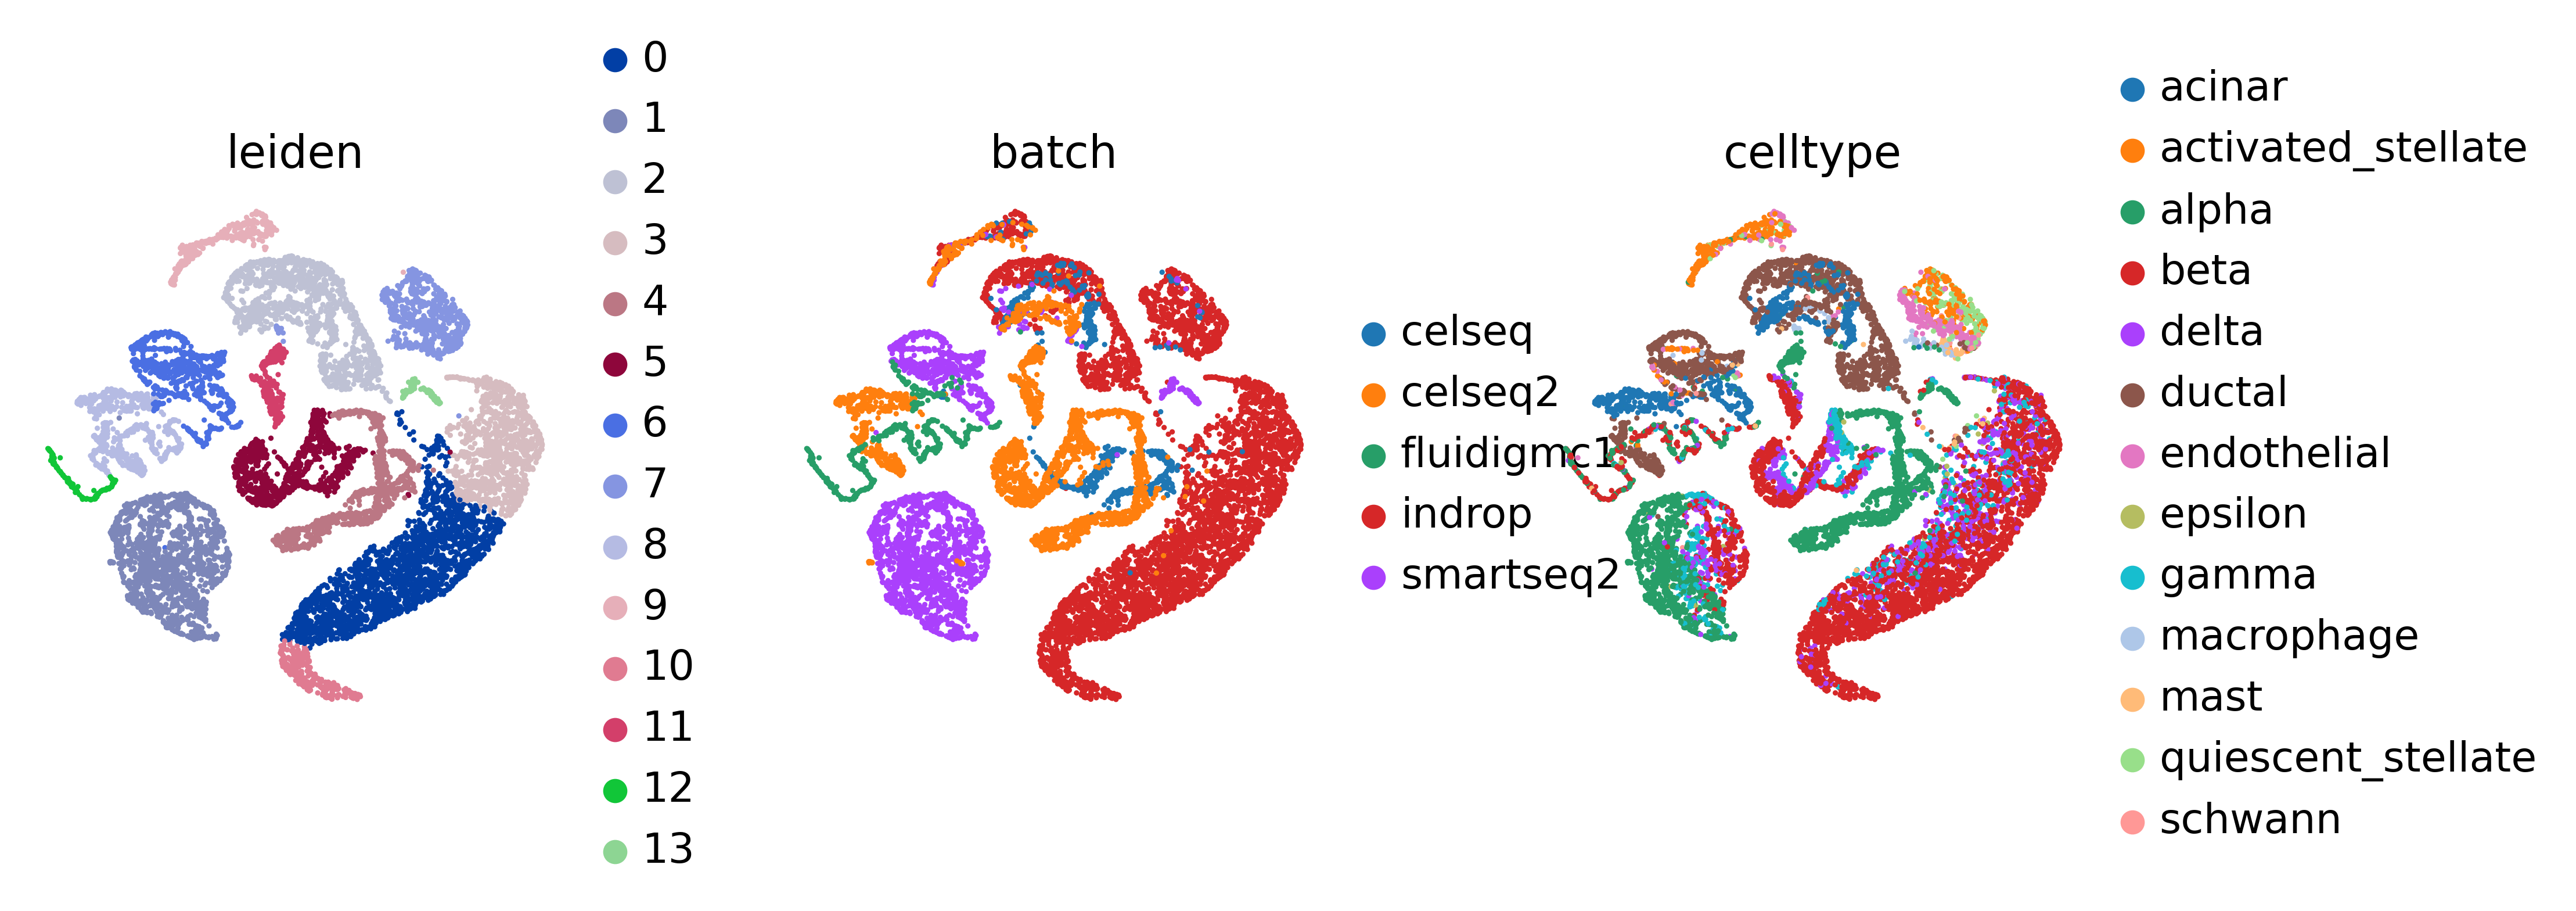

In [241]:
sc.pl.umap(adata_raw, color=['leiden', 'batch', 'celltype'])

In [242]:
ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
asw = scib.metrics.silhouette(adata_raw, label_key='celltype', embed='X_pca_harmony')
b_asw = scib.metrics.silhouette_batch(adata_raw, batch_key='batch', label_key='celltype', embed='X_pca_harmony', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

/tmp/ipykernel_117530/1864667517.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_117530/1864667517.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_117530/1864667517.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_117530/1864667517.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata_raw, group1 = 'leiden', group2='cel

ARI: 0.2838, NMI: 0.4581, ASW: 0.3930, batch-ASW: 0.6206


In [243]:
df = pd.read_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', header=0, index_col=0)
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.401422,0.588144,0.191474,0.665683
0,alra,0.363079,0.663753,0.542887,0.600716
0,dca,0.214086,0.544808,0.205109,0.559413
0,deepimpute,0.227909,0.561023,0.191547,0.668581
0,magic,0.195887,0.542433,0.198859,0.647285
0,saver,0.344303,0.655148,0.547001,0.754595
0,scimpute,0.242540,0.556048,0.191194,0.700310
0,scscope,0.249670,0.521141,0.190445,0.657192
0,scvi,0.379581,0.684856,0.509826,0.613476
0,bis,0.260364,0.387915,0.367052,0.397259


In [244]:
# combineing results 
df1 = pd.DataFrame({'Methods': ['bis'],
                   'ARI': [ari],
                   "NMI": [nmi],
                   "ASW": [asw],
                   "b_ASW": [b_asw]})
df = pd.concat([df, df1])
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.401422,0.588144,0.191474,0.665683
0,alra,0.363079,0.663753,0.542887,0.600716
0,dca,0.214086,0.544808,0.205109,0.559413
0,deepimpute,0.227909,0.561023,0.191547,0.668581
0,magic,0.195887,0.542433,0.198859,0.647285
0,saver,0.344303,0.655148,0.547001,0.754595
0,scimpute,0.242540,0.556048,0.191194,0.700310
0,scscope,0.249670,0.521141,0.190445,0.657192
0,scvi,0.379581,0.684856,0.509826,0.613476
0,bis,0.260364,0.387915,0.367052,0.397259


In [245]:
# adata_raw.write('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_bis.h5ad')

In [246]:
# df.to_csv('/home/suyanchi/project/dab/results/batch/'+dataset_name[i]+'_metric.csv', sep=',')